In [22]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [23]:
data = pd.read_csv("train.txt", sep=';')
data.columns = ["Text", "Emotions"]
print(data.head())

                                                Text Emotions
0  i can go from feeling so hopeless to so damned...  sadness
1   im grabbing a minute to post i feel greedy wrong    anger
2  i am ever feeling nostalgic about the fireplac...     love
3                               i am feeling grouchy    anger
4  ive been feeling a little burdened lately wasn...  sadness


In [24]:
data


,Text,Emotions
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness
...,...,...
15994,i just had a very brief time in the beanbag an...,sadness
15995,i am now turning and i feel pathetic that i am...,sadness
15996,i feel strong and good overall,joy
15997,i feel like this was such a rude comment and i...,anger


In [25]:
texts = data["Text"].tolist()
labels = data["Emotions"].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [26]:
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [27]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [28]:
one_hot_labels = keras.utils.to_categorical(labels)

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences,
                                                one_hot_labels,
                                                test_size=0.2)

In [30]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=128, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=len(one_hot_labels[0]), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.3869 - loss: 1.5137 - val_accuracy: 0.6856 - val_loss: 0.8533
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.8552 - loss: 0.4555 - val_accuracy: 0.8103 - val_loss: 0.5716
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9841 - loss: 0.0701 - val_accuracy: 0.8134 - val_loss: 0.5977
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.9942 - loss: 0.0305 - val_accuracy: 0.8141 - val_loss: 0.6242
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.9965 - loss: 0.0169 - val_accuracy: 0.8125 - val_loss: 0.6927
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9968 - loss: 0.0133 - val_accuracy: 0.8091 - val_loss: 0.6869
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.9979 - loss: 0.0093 - val_accuracy: 0.8084 - val_loss: 0.7659
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9969 - loss: 0.0110 - val_accurac

In [31]:
input_text = "She didn't come today because she lost her dog yestertay!"


input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
prediction = model.predict(padded_input_sequence)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
['sadness']


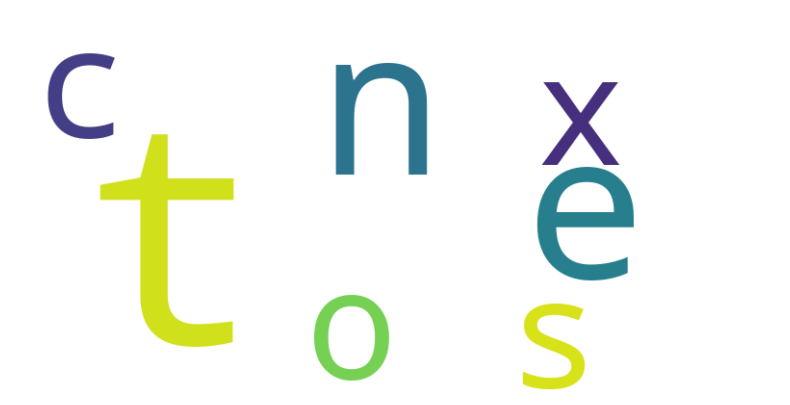

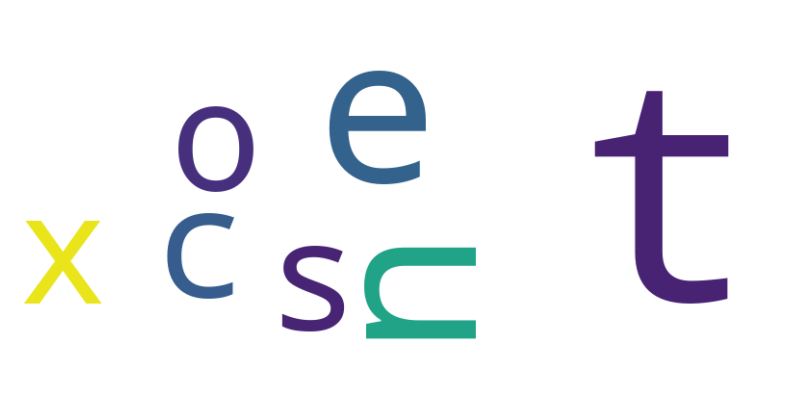

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'test.txt' is a list of words. If it's a file, you need to read it first.
# Example assuming test.txt is a list:
# with open("test.txt", "r") as file:
#     words = file.read().split()

# wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words))
# OR, if test is a list of words named 'test':
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(test)) # Assuming 'test' is defined elsewhere
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.axis("off")
plt.show()
